In [3]:
import pandas as pd
import numpy as np

In [44]:
"""Récupération des données"""

emplacement = "DVF_75_2022.csv"

df_brut = pd.read_csv(emplacement, sep=",")

print(df_brut.head(5))
print(df_brut.shape)

    id_mutation date_mutation  numero_disposition nature_mutation  \
0  2022-1621602    2022-01-04                   1           Vente   
1  2022-1621602    2022-01-04                   1           Vente   
2  2022-1621602    2022-01-04                   1           Vente   
3  2022-1621602    2022-01-04                   1           Vente   
4  2022-1621603    2022-01-06                   1           Vente   

   valeur_fonciere  adresse_numero adresse_suffixe adresse_nom_voie  \
0         580000.0            13.0             NaN     RUE DE SOFIA   
1         580000.0            13.0             NaN     RUE DE SOFIA   
2         580000.0            13.0             NaN     RUE DE SOFIA   
3         580000.0            13.0             NaN     RUE DE SOFIA   
4         605000.0            51.0             NaN      RUE CHARLOT   

  adresse_code_voie  code_postal  ...   type_local surface_reelle_bati  \
0              9002      75018.0  ...   Dépendance                 NaN   
1         

/tmp/ipykernel_4081/2621455301.py:5: DtypeWarning: Columns (18,20,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_brut = pd.read_csv(emplacement, sep=",")


In [94]:
"""Mise en copie, sélection des variables"""

df_travail = df_brut.copy()

variables = df_travail.columns
print(variables)

variables_interet = ['id_mutation', 'date_mutation', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_suffixe',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'id_parcelle', 'ancien_id_parcelle', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero',
       'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez',
       'lot4_numero', 'lot4_surface_carrez', 'lot5_numero',
       'lot5_surface_carrez', 'nombre_lots', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales', 'longitude', 'latitude']

df_travail = df_travail.loc[:,variables_interet]
df_travail.head()

Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_suffixe',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'ancien_code_commune',
       'ancien_nom_commune', 'id_parcelle', 'ancien_id_parcelle',
       'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero',
       'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez',
       'lot4_numero', 'lot4_surface_carrez', 'lot5_numero',
       'lot5_surface_carrez', 'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
       'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale',
       'nature_culture_speciale', 'surface_terrain', 'longitude', 'latitude'],
      dtype='object')


,id_mutation,date_mutation,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,...,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
0,2022-1621602,2022-01-04,Vente,580000.0,13.0,NaN,RUE DE SOFIA,9002,75018.0,75118,...,NaN,NaN,NaN,NaN,2,Dépendance,NaN,0.0,2.348168,48.884490
1,2022-1621602,2022-01-04,Vente,580000.0,13.0,NaN,RUE DE SOFIA,9002,75018.0,75118,...,NaN,NaN,NaN,NaN,3,Dépendance,NaN,0.0,2.348168,48.884490
2,2022-1621602,2022-01-04,Vente,580000.0,13.0,NaN,RUE DE SOFIA,9002,75018.0,75118,...,NaN,NaN,NaN,NaN,3,Appartement,25.0,2.0,2.348168,48.884490
3,2022-1621602,2022-01-04,Vente,580000.0,13.0,NaN,RUE DE SOFIA,9002,75018.0,75118,...,NaN,NaN,NaN,NaN,2,Appartement,20.0,2.0,2.348168,48.884490
4,2022-1621603,2022-01-06,Vente,605000.0,51.0,NaN,RUE CHARLOT,1880,75003.0,75103,...,NaN,NaN,NaN,NaN,1,Appartement,42.0,3.0,2.362871,48.863374


In [175]:
df_travail['lot1_numero'] = pd.to_numeric(df_travail['lot1_numero'], errors='coerce')
df_travail = df_travail.loc[df_travail['lot1_numero']>0]
print(df_travail.isnull().sum())
print(df_travail.dtypes)

id_mutation                      0
date_mutation                    0
prix                            34
type_local                       3
appartement                      0
nb_dépendances                   0
surface_reelle_bati          40905
surface_carrez                   0
nombre_pieces_principales        4
adresse_numero                   5
adresse_suffixe              75668
adresse_nom_voie                 0
adresse_code_voie                0
code_postal                      0
code_commune                     0
nom_commune                      0
code_departement                 0
nature_mutation                  0
id_parcelle                      0
ancien_id_parcelle           79157
lot1_numero                      0
lot1_surface_carrez          42679
lot2_numero                  38624
lot2_surface_carrez          67458
lot3_numero                  72628
lot3_surface_carrez          77998
lot4_numero                  76845
lot4_surface_carrez          78849
lot5_numero         

In [134]:
"""On va se restreindre aux ventes, donc enlever les lignes correspondant aux : vente en l’état futur
d’achèvement, vente de terrain à bâtir, adjudication, expropriation ou échange"""

df_travail = df_travail.loc[df_travail['nature_mutation']=='Vente']

In [136]:
"""Ensuite, on va se restreindre aux appartements, donc supprimer toutes 
les ventes qui ont inclus une maison ou un local commercial"""

doublons_id = df_travail.groupby('id_mutation').count()['date_mutation']

doublons_id = doublons_id.loc[doublons_id>1].reset_index()

doublons_id = doublons_id.rename(columns={'date_mutation':'nb_lignes'})

doublons_id.head(5)

,id_mutation,nb_lignes
0,2022-1621602,4
1,2022-1621603,3
2,2022-1621606,3
3,2022-1621607,2
4,2022-1621608,2


In [137]:
id_ventes_à_supprimer = []

for id in doublons_id['id_mutation'].tolist():
    liste = df_travail.loc[df_travail['id_mutation']==id]['type_local'].tolist()
    if 'Maison' in liste:
        id_ventes_à_supprimer.append(id)
    elif 'Local industriel. commercial ou assimilé' in liste:
        id_ventes_à_supprimer.append(id)
    else:
        pass

print(id_ventes_à_supprimer[:10])

['2022-1621685', '2022-1621768', '2022-1621771', '2022-1621961', '2022-1622019', '2022-1622026', '2022-1622080', '2022-1622087', '2022-1622136', '2022-1622200']


In [11]:
#On prend un exemple pour vérifier qu'on a bien trouvé les ventes à supprimer
print(df_travail.loc[df_travail['id_mutation']=='2022-1621685'].head())

      id_mutation date_mutation nature_mutation  valeur_fonciere  \
144  2022-1621685    2022-01-12           Vente       80000000.0   
145  2022-1621685    2022-01-12           Vente       80000000.0   
146  2022-1621685    2022-01-12           Vente       80000000.0   
147  2022-1621685    2022-01-12           Vente       80000000.0   
148  2022-1621685    2022-01-12           Vente       80000000.0   
149  2022-1621685    2022-01-12           Vente       80000000.0   
150  2022-1621685    2022-01-12           Vente       80000000.0   
151  2022-1621685    2022-01-12           Vente       80000000.0   
152  2022-1621685    2022-01-12           Vente       80000000.0   
153  2022-1621685    2022-01-12           Vente       80000000.0   
154  2022-1621685    2022-01-12           Vente       80000000.0   
155  2022-1621685    2022-01-12           Vente       80000000.0   
156  2022-1621685    2022-01-12           Vente       80000000.0   
157  2022-1621685    2022-01-12           Vente 

In [139]:
"""On retire les ventes de maison ou de local"""

df_travail = df_travail.loc[~df_travail['id_mutation'].isin(id_ventes_à_supprimer)]

df_travail = df_travail.loc[~df_travail['type_local'].isin(['Maison', 'Local industriel. commercial ou assimilé'])]


Empty DataFrame
Columns: [id_mutation, date_mutation, prix, type_local, appartement, nb_dépendances, surface_reelle_bati, surface_carrez, nombre_pieces_principales, adresse_numero, adresse_suffixe, adresse_nom_voie, adresse_code_voie, code_postal, code_commune, nom_commune, code_departement, nature_mutation, id_parcelle, ancien_id_parcelle, lot1_numero, lot1_surface_carrez, lot2_numero, lot2_surface_carrez, lot3_numero, lot3_surface_carrez, lot4_numero, lot4_surface_carrez, lot5_numero, lot5_surface_carrez, nombre_lots, valeur_fonciere, longitude, latitude, dépendance, prix_au_m2]
Index: []

[0 rows x 36 columns]
Axes(0.125,0.11;0.775x0.77)


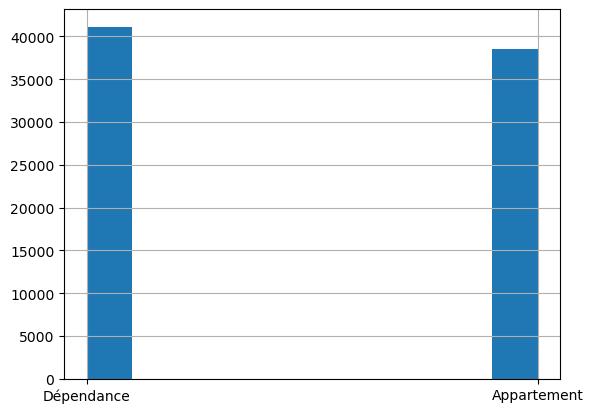

In [140]:
"""Vérification"""
print(df_travail.loc[df_travail['id_mutation']=='2022-1621685'])

print(df_travail['type_local'].hist())

In [96]:
"""Maintenant, occupons nous des ventes groupées qui restent"""

#créer deux variables : appartement (1 si oui, 0 sinon) dépendance (1 si oui, 0 sinon)
df_travail['appartement']=0.0
df_travail['dépendance']=0.0
df_travail['surface_carrez']=0.0
df_travail['prix']=df_travail['valeur_fonciere']
df_travail['nb_dépendances']=0.0
df_travail['prix_au_m2']=0.0

df_travail.loc[df_travail['type_local']=='Appartement', 'appartement']=1
df_travail.loc[df_travail['type_local']=='Dépendance', 'dépendance']=1


In [98]:
df_travail.columns
ordre = ['id_mutation', 'date_mutation', 'prix', 'type_local', 'appartement', 'nb_dépendances', 
        'surface_reelle_bati', 'surface_carrez', 'nombre_pieces_principales',
       'adresse_numero', 'adresse_suffixe', 'adresse_nom_voie',
       'adresse_code_voie', 'code_postal', 'code_commune', 'nom_commune',
       'code_departement', 'nature_mutation', 'id_parcelle', 'ancien_id_parcelle', 'lot1_numero',
       'lot1_surface_carrez', 'lot2_numero', 'lot2_surface_carrez',
       'lot3_numero', 'lot3_surface_carrez', 'lot4_numero',
       'lot4_surface_carrez', 'lot5_numero', 'lot5_surface_carrez',
       'nombre_lots', 'valeur_fonciere',
        'longitude', 'latitude',
       'dépendance', 'prix_au_m2']
df_travail = df_travail[ordre]
df_travail.head()

,id_mutation,date_mutation,prix,type_local,appartement,nb_dépendances,surface_reelle_bati,surface_carrez,nombre_pieces_principales,adresse_numero,...,lot4_numero,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,valeur_fonciere,longitude,latitude,dépendance,prix_au_m2
0,2022-1621602,2022-01-04,580000.0,Dépendance,0.0,0.0,NaN,0.0,0.0,13.0,...,NaN,NaN,NaN,NaN,2,580000.0,2.348168,48.884490,1.0,0.0
1,2022-1621602,2022-01-04,580000.0,Dépendance,0.0,0.0,NaN,0.0,0.0,13.0,...,NaN,NaN,NaN,NaN,3,580000.0,2.348168,48.884490,1.0,0.0
2,2022-1621602,2022-01-04,580000.0,Appartement,1.0,0.0,25.0,0.0,2.0,13.0,...,NaN,NaN,NaN,NaN,3,580000.0,2.348168,48.884490,0.0,0.0
3,2022-1621602,2022-01-04,580000.0,Appartement,1.0,0.0,20.0,0.0,2.0,13.0,...,NaN,NaN,NaN,NaN,2,580000.0,2.348168,48.884490,0.0,0.0
4,2022-1621603,2022-01-06,605000.0,Appartement,1.0,0.0,42.0,0.0,3.0,51.0,...,NaN,NaN,NaN,NaN,1,605000.0,2.362871,48.863374,0.0,0.0


In [58]:
#Trouvons les identifiants des ventes groupées restantes

id_to_merge = df_travail.groupby('id_mutation').count()['date_mutation']

id_to_merge = id_to_merge.loc[id_to_merge>1].reset_index()

id_to_merge = id_to_merge.rename(columns={'date_mutation':'nb_lignes'})

print(set(id_to_merge['nb_lignes'].tolist()))

print(id_to_merge.groupby('nb_lignes').count()['id_mutation'])

print(id_to_merge.loc[id_to_merge['nb_lignes']==73])

{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 27, 28, 30, 31, 32, 33, 34, 35, 36, 38, 39, 52, 53, 73}
nb_lignes
2     17992
3      5014
4      1615
5       388
6       165
7        63
8        36
9        25
10       20
11        9
12        9
13        6
14        4
15        2
16        2
17        1
19        6
20        7
21        3
22        1
23        1
24        1
25        1
27        1
28        2
30        1
31        1
32        1
33        1
34        2
35        2
36        1
38        1
39        3
52        1
53        1
73        1
Name: id_mutation, dtype: int64
       id_mutation  nb_lignes
3397  2022-1628161         73


In [59]:
"""Fonction qui s'occupe d'ajouter aux appartements leurs éventuelles dépendances"""

def dependance(id, df):
    #id : indice de vente
    #df : dataframe
    
    mini_df = df.loc[df['id_mutation']==id] #on récupère la vente correspondant à l'id
    mini_df_appart = df.loc[(df['id_mutation']==id) & (df['appartement']==1)] #on récupère les appartements vendus dans ce groupe
    index_app = mini_df.index.tolist() #indice des appartements
    
    nb_tot_dep = mini_df['dépendance'].sum() #nombre total de dépendances dans la vente
    nb_tot_app = mini_df['appartement'].sum() #nombre total d'appartements dans la vente

    if nb_tot_dep > 0: #au moins un appartement dans la vente
            
        if nb_tot_dep>0: #au moins une dépendance dans la vente
            
            if nb_tot_dep >= nb_tot_app: #si plus de dépendances que d'appart : division euclidienne
                nb_dep = nb_tot_dep // nb_tot_app
                df.loc[(df['id_mutation']==id) & (df['appartement']==1), 'nb_dépendances'] = nb_dep
                
            else: #si moins de dépendance que d'appart, on répartit les dépendances "au hasard"
                for i in range(nb_tot_dep):
                    df.loc[index_app[i], 'nb_dépendances'] = 1
            
        else: #si aucune dépendance, rien à faire
            pass
            
    else: #si aucun appartment dans la vente, rien à faire
        pass

In [100]:
"""Test de la fonction dépendance"""
df_test_dep = df_travail.loc[df_travail['id_mutation']=='2022-1622961']
print(df_test_dep)
dependance('2022-1622961', df_test_dep)
print(df_test_dep)

       id_mutation date_mutation       prix   type_local  appartement  \
2507  2022-1622961    2022-02-01  1450000.0   Dépendance          0.0   
2508  2022-1622961    2022-02-01  1450000.0   Dépendance          0.0   
2509  2022-1622961    2022-02-01  1450000.0  Appartement          1.0   
2510  2022-1622961    2022-02-01  1450000.0  Appartement          1.0   
2511  2022-1622961    2022-02-01  1450000.0   Dépendance          0.0   
2512  2022-1622961    2022-02-01  1450000.0   Dépendance          0.0   

      nb_dépendances  surface_reelle_bati  surface_carrez  \
2507             0.0                  NaN             0.0   
2508             0.0                  NaN             0.0   
2509             0.0                144.0             0.0   
2510             0.0                115.0             0.0   
2511             0.0                  NaN             0.0   
2512             0.0                  NaN             0.0   

      nombre_pieces_principales  adresse_numero  ... lot4_nu

In [75]:
"""Fonction qui s'occupe de faire la proportionnalité des prix s'il y a plus de deux appartements dans la vente"""

def prix(id, df):
    #id : indice de la vente
    #df : dataframe
    
    mini_df_appart = df.loc[(df['id_mutation']==id) & (df['appartement']==1)] #on récupère les appartements de cette vente
    index_app = mini_df_appart.index.tolist() #index des appartements
    
    nb_tot_app = mini_df_appart['appartement'].sum() #nombre total d'appartments dans la vente
    
    if nb_tot_app > 1: #s'il y a plus d'un appartement dans la vente
        
        surface_totale = mini_df_appart['surface_reelle_bati'].sum() #surface réelle totale
        prix_lot = mini_df_appart.loc[index_app[0]]['valeur_fonciere'] #on récupère la valeur foncière totale
        
        for app in index_app: #pour chaque appartement, on fait le prorata selon sa surface réelle
            surface_app = mini_df_appart.loc[app]['surface_reelle_bati']
            df.loc[app, 'prix'] = prix_lot*(surface_app)/(surface_totale)
            
    else: #si un seul appartement dans la vente ou aucun, rien à faire
        pass

In [93]:
"""Test de la fonction prix"""
df_test_prix = df_travail.loc[df_travail['id_mutation']=='2022-1622961']
print(df_test_prix)
dependance('2022-1622961', df_test_prix)
prix('2022-1622961', df_test_prix)
print(df_test_prix)

Empty DataFrame
Columns: [id_mutation, date_mutation, prix, type_local, appartement, nb_dépendances, surface_reelle_bati, surface_carrez, nombre_pieces_principales, adresse_numero, adresse_suffixe, adresse_nom_voie, adresse_code_voie, code_postal, code_commune, nom_commune, code_departement, nature_mutation, id_parcelle, ancien_id_parcelle, lot1_numero, lot1_surface_carrez, lot2_numero, lot2_surface_carrez, lot3_numero, lot3_surface_carrez, lot4_numero, lot4_surface_carrez, lot5_numero, lot5_surface_carrez, nombre_lots, valeur_fonciere, longitude, latitude, dépendance, prix_au_m2]
Index: []

[0 rows x 36 columns]
Empty DataFrame
Columns: [id_mutation, date_mutation, prix, type_local, appartement, nb_dépendances, surface_reelle_bati, surface_carrez, nombre_pieces_principales, adresse_numero, adresse_suffixe, adresse_nom_voie, adresse_code_voie, code_postal, code_commune, nom_commune, code_departement, nature_mutation, id_parcelle, ancien_id_parcelle, lot1_numero, lot1_surface_carrez, lo

In [159]:
"""Fonction qui s'occupe d'ajouter les dépendances, le prix, la surface carrez"""

list_lots = ['lot1_surface_carrez', 'lot2_surface_carrez', 'lot3_surface_carrez', 'lot4_surface_carrez', 
                 'lot5_surface_carrez']

def surface_nb_dep_prix(id, df):
    #id : indice de la vente
    #df : dataframe

    mini_df = df.loc[(df['id_mutation']==id)] #on récupère la vente
    mini_df_appart = df.loc[(df['id_mutation']==id) & (df['appartement']==1)] #on récupère les appartements de cette vente
    index_app = mini_df_appart.index.tolist() #index des appartements
    
    nb_tot_app = mini_df_appart['appartement'].sum() #nombre total d'appartments dans la vente
    
    if nb_tot_app >= 1: #s'il y a au moins un appartement dans la vente, on essaie de récupérer pur chaque appart. la surface du lot associé
        
        mini_df_group_lot_surface = mini_df.groupby('lot1_numero').max()[list_lots] #pour chaque numéro de lot, on récupère la surface carrez max
        mini_df_group_lot_dep = mini_df.groupby('lot1_numero').sum()['dépendance'] #pour chaque numéro de lot, on récupère le nombre de dépendance

        for index in index_app:
            num_lot = mini_df.loc[index,'lot1_numero'] #on récupère le numéro de lot associé à l'appartement
            surface_carrez = mini_df_group_lot_surface.loc[num_lot].max() #on récupère la surface carrez associée au lot
            nb_dépendance = mini_df_group_lot_dep[num_lot] #on récupère le nombre de dépendances
            df.loc[index,'surface_carrez']=surface_carrez #on met à jour le dataframe
            df.loc[index,'nb_dépendances']=nb_dépendance #on met à jour le dataframe
            
        if nb_tot_app > 1: #s'il y a plus d'un appartement dans la vente, on met à jour le prix au prorata de la surface réelle
            surface_totale = mini_df_appart['surface_reelle_bati'].sum() #surface réelle totale
            prix_lot = mini_df_appart.loc[index_app[0]]['valeur_fonciere'] #on récupère la valeur foncière totale
            
            for index in index_app: #pour chaque appartement, on fait le prorata selon sa surface réelle
                surface_app = mini_df_appart.loc[index]['surface_reelle_bati'] #on récupère la surface de l'appartement
                df.loc[index, 'prix'] = prix_lot*(surface_app)/(surface_totale) #on met à jour le prix
                
        else: #si un seul appartement, rien à faire
            pass
            
    else: #si aucun appartement dans la vente, rien à faire
        pass

In [163]:
"""Test de la fonction"""
df_test_carrez = df_travail.loc[df_travail['id_mutation']=='2022-1622002']
print(df_test_carrez)
surface_nb_dep_prix('2022-1622002', df_test_carrez)
print(df_test_carrez)

      id_mutation date_mutation      prix   type_local  appartement  \
750  2022-1622002    2022-01-18  570000.0  Appartement          1.0   

     nb_dépendances  surface_reelle_bati  surface_carrez  \
750             0.0                 61.0             0.0   

     nombre_pieces_principales  adresse_numero  ... lot4_numero  \
750                        2.0            40.0  ...         NaN   

    lot4_surface_carrez lot5_numero  lot5_surface_carrez  nombre_lots  \
750                 NaN         NaN                  NaN            2   

    valeur_fonciere  longitude   latitude dépendance  prix_au_m2  
750        570000.0   2.349327  48.872577        0.0         0.0  

[1 rows x 36 columns]
      id_mutation date_mutation      prix   type_local  appartement  \
750  2022-1622002    2022-01-18  570000.0  Appartement          1.0   

     nb_dépendances  surface_reelle_bati  surface_carrez  \
750             0.0                 61.0           60.83   

     nombre_pieces_principales  a

In [36]:
"""On peut enfin garder seulement les lignes correspondant à un appartement, et réorganiser la base"""
df_travail_app = df_travail.loc[df_travail['Appartement']==1]
df_travail_app.head(25)

,id_mutation,date_mutation,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,...,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,Appartement,Dépendance,Surface_carrez,Prix,Nb_dépendances,Prix_au_m2
2,2022-1621602,2022-01-04,Vente,580000.0,13.0,NaN,RUE DE SOFIA,9002,75018.0,75118,...,25.0,2.0,2.348168,48.884490,1.0,0.0,61.00,322222.222222,1.0,0.0
3,2022-1621602,2022-01-04,Vente,580000.0,13.0,NaN,RUE DE SOFIA,9002,75018.0,75118,...,20.0,2.0,2.348168,48.884490,1.0,0.0,61.00,257777.777778,1.0,0.0
4,2022-1621603,2022-01-06,Vente,605000.0,51.0,NaN,RUE CHARLOT,1880,75003.0,75103,...,42.0,3.0,2.362871,48.863374,1.0,0.0,40.66,605000.000000,2.0,0.0
10,2022-1621606,2022-01-05,Vente,716250.0,6.0,NaN,RUE PAUL ESCUDIER,7155,75009.0,75109,...,69.0,3.0,2.332324,48.880353,1.0,0.0,66.26,716250.000000,2.0,0.0
13,2022-1621607,2022-01-05,Vente,320000.0,4.0,NaN,RUE DU CHATEAU LANDON,1924,75010.0,75110,...,33.0,2.0,2.362613,48.879658,1.0,0.0,35.19,320000.000000,1.0,0.0
14,2022-1621608,2022-01-07,Vente,320000.0,134.0,NaN,AV GAMBETTA,3933,75020.0,75120,...,29.0,1.0,2.405513,48.872782,1.0,0.0,32.52,320000.000000,1.0,0.0
16,2022-1621609,2022-01-06,Vente,220000.0,9.0,NaN,RUE ELYSEE MENILMONTANT,3192,75020.0,75120,...,36.0,2.0,2.386648,48.869335,1.0,0.0,34.53,220000.000000,1.0,0.0
18,2022-1621610,2022-01-04,Vente,280000.0,18.0,NaN,RUE DES HAIES,4452,75020.0,75120,...,28.0,2.0,2.400622,48.852508,1.0,0.0,24.59,280000.000000,0.0,0.0
19,2022-1621611,2022-01-04,Vente,200000.0,195.0,NaN,RUE DE CRIMEE,2443,75019.0,75119,...,27.0,2.0,2.375845,48.891167,1.0,0.0,27.64,200000.000000,1.0,0.0
21,2022-1621612,2022-01-06,Vente,677500.0,79.0,NaN,RUE DES GRAVILLIERS,4302,75003.0,75103,...,58.0,3.0,2.353479,48.864674,1.0,0.0,57.12,677500.000000,1.0,0.0


In [166]:
df_travail.to_csv('test.csv')